In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn graphviz


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz


In [3]:
import pandas as pd

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r"C:\Users\kommo\Desktop\data science530\Area Safety Prediction.csv")

# 1️⃣ Drop any duplicates (if present)
df = df.drop_duplicates()

# 2️⃣ Check for missing values
print("Missing Values:\n", df.isnull().sum())

# 3️⃣ Normalize numerical features
numerical_features = [
    'sex ratio', 'r cases', 'crimes', 'wine shops', 'men literacy', 
    'porn access', 'psych cases', 'desserted area', 'ring roads', 
    'slum areas', 'outcome'
]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 4️⃣ Define features (X) and target (y)
X = df.drop(columns=['class'])  # Independent variables
y = df['class']  # Target variable

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print processed data
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Missing Values:
 area              0
sex ratio         0
r cases           0
crimes            0
wine shops        0
men literacy      0
porn access       0
psych cases       0
desserted area    0
ring roads        0
slum areas        0
season            0
time of visit     0
outcome           0
class             0
dtype: int64
Training Data Shape: (80, 14)
Testing Data Shape: (20, 14)


In [10]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

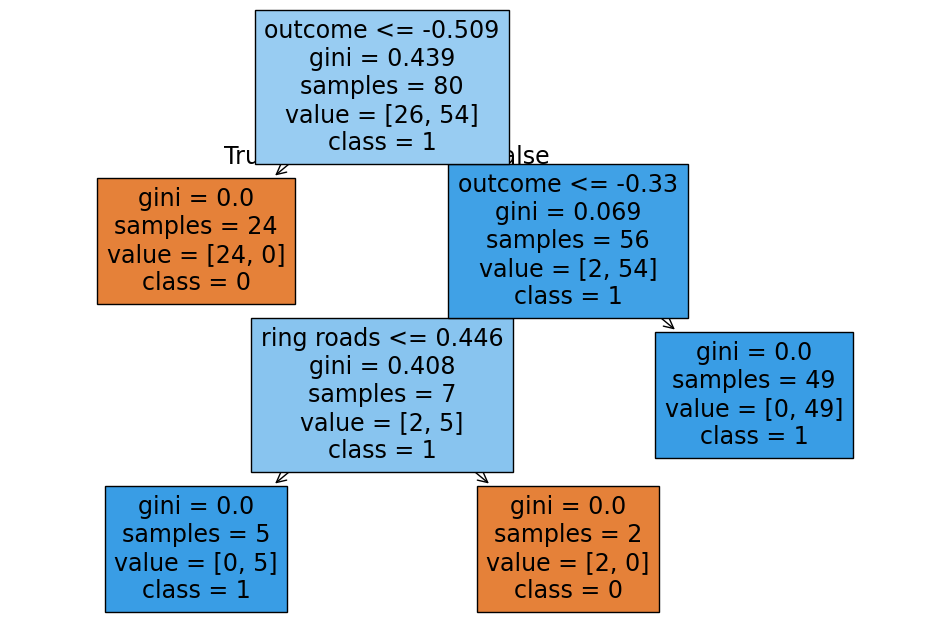

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in y.unique()], filled=True)
plt.show()


In [21]:
import graphviz

Accuracy: 1.0


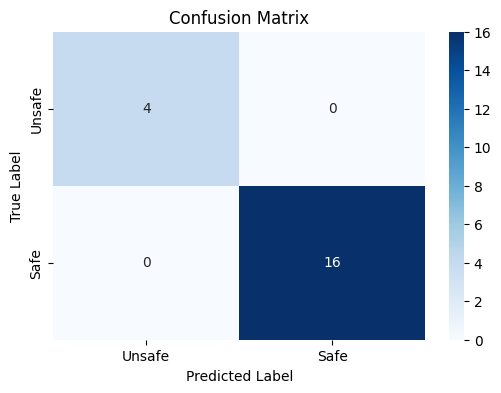

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = dt_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate performance
y_pred_best = best_model.predict(X_test)

# Accuracy
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))

# Classification Report
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Optimized Accuracy: 1.0
Optimized Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

